In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
import numpy as np
from patchify import patchify
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
from PIL import Image
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
!ls -lah '/content/drive/MyDrive/DubaiDataset-20231025T060517Z-001'
!ls -lah '/content/drive/MyDrive/DubaiDataset-20231025T060517Z-001'

ls: cannot access '/content/drive/MyDrive/DubaiDataset-20231025T060517Z-001': No such file or directory
ls: cannot access '/content/drive/MyDrive/DubaiDataset-20231025T060517Z-001': No such file or directory


In [ ]:
dataset_root_folder = "/content/drive/MyDrive/"

In [ ]:
dataset_name = 'DS'

In [ ]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):#walk returns the path ,subdirec,files.
    dir_name = path.split(os.path.sep)[-1]
    # print(dir_name)
    if dir_name =="images":
    # if dir_name =="masks":
      images = os.listdir(path)
      # print(images)
      # print(path)
      for i ,image_name in enumerate(images):
        if(image_name.endswith('.jpg')):
        # if(image_name.endswith('.png')):
          print(image_name)
          a = True

image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_0

In [ ]:
image_patch_size = 256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
image_patches = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [ ]:
len(image_patches)

2

In [ ]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [ ]:
minmaxscaler=MinMaxScaler()

In [ ]:
image_x = image_patches[0,0,:,:]
#MinMaxscaler
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [ ]:
image_y[0].shape

(256, 256, 3)

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type=='masks':
          image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
               individual_patched_image = patched_images[i,j,:,:]
               individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
               individual_patched_image = individual_patched_image[0]
               # print(individual_patched_image.shape)
               image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
               individual_patched_mask = patched_images[i,j,:,:]
               individual_patched_mask = individual_patched_mask[0]
               mask_dataset.append(individual_patched_mask)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
type(image_dataset[0])

numpy.ndarray

In [ ]:
type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3)))

numpy.ndarray

In [ ]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
class_building=np.array(tuple(int(class_building[i:i+2],16)for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
class_land=np.array(tuple(int(class_land[i:i+2],16)for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
class_road=np.array(tuple(int(class_road[i:i+2],16)for i in (0,2,4)))
print(class_road)

class_vegetation='#FEDD3A'
class_vegetation=class_vegetation.lstrip('#')
class_vegetation=np.array(tuple(int(class_vegetation[i:i+2],16)for i in (0,2,4)))
print(class_vegetation)

class_water='#E2A929'
class_water=class_water.lstrip('#')
class_water=np.array(tuple(int(class_water[i:i+2],16)for i in (0,2,4)))
print(class_water)

class_unlabeled='#9B9B9B'
class_unlabeled=class_unlabeled.lstrip('#')
class_unlabeled=np.array(tuple(int(class_unlabeled[i:i+2],16)for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [ ]:
mask_dataset.shape[0]

945

In [ ]:
label=individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label == class_water,axis=-1)] = 0
  label_segment[np.all(label == class_land,axis=-1)] = 1
  label_segment[np.all(label == class_road,axis=-1)] = 2
  label_segment[np.all(label == class_building,axis=-1)] = 3
  label_segment[np.all(label == class_vegetation,axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled,axis=-1)] = 5
  # print(label_segment)
  label_segment=label_segment[:,:,0]
  # print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
print(len(labels))

945


In [ ]:
labels=np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
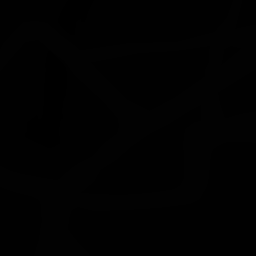

In [ ]:
labels[3]

In [ ]:
labels=np.expand_dims(labels,axis=3)

In [ ]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
print("total unique labels based on marks:",format(np.unique(labels)))

total unique labels based on marks: [0 1 2 3 4 5]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
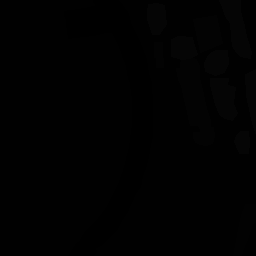

In [ ]:
labels[0][:,:,0]

In [ ]:
total_classes=len(np.unique(labels))

In [ ]:
total_classes

6

In [ ]:
len(labels)

945

In [ ]:
labels_categorical_dataset = to_categorical(labels,num_classes = total_classes)

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [ ]:
master_training_datset = image_dataset

In [ ]:
master_training_datset.shape

(945, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

mask_dataset=np.expand_dims(mask_dataset,axis=3)

In [ ]:
labels = []

for i in range(mask_dataset.shape[0]):
  label=np.zeros(mask_dataset[i].shape,dtype=np.uint8)
  label[mask_dataset[i] == class_water] = 0
  label[mask_dataset[i] == class_land] = 1
  label[mask_dataset[i] == class_road] = 2
  label[mask_dataset[i] == class_building] = 3
  label[mask_dataset[i] == class_vegetation] = 4
  label[mask_dataset[i] == class_unlabeled] = 5
  label=label[:,:,0]
  labels.append(label)

In [ ]:
labels = np.array(labels)
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

master_training_datset = image_dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(master_training_datset, labels_categorical_dataset, test_size=0.15, random_state=100)

# Flatten the training and testing data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Flatten Masks
y_train_int = np.argmax(y_train, axis=3)
y_train_flattened = y_train_int.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(master_training_datset, labels_categorical_dataset, test_size=0.15, random_state=100)
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train_flattened, y_train_flattened)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train)